In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import proplot as pplt

In [2]:
import cartopy.crs as crs
import cartopy.feature as cfeature

In [ ]:
import tslearn
from tslearn.clustering import TimeSeriesKMeans

## Load files

In [3]:
hfls = xr.open_dataset('data/CMIP6.hfls.LabSea.Control.month.072022.nc')
hfss = xr.open_dataset('data/CMIP6.hfss.LabSea.Control.month.072022.nc')
psl = xr.open_dataset('data/CMIP6.psl.LabSea.Control.month.072022.nc')
tas = xr.open_dataset('data/CMIP6.tas.LabSea.Control.month.072022.nc')

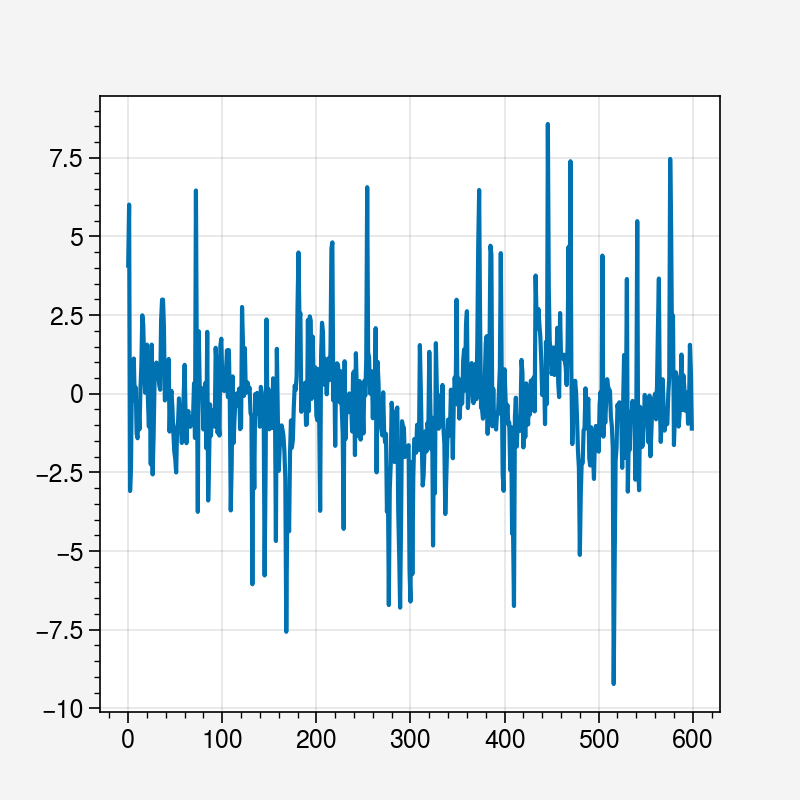

In [4]:
plt.plot(tas.tas.data[1])

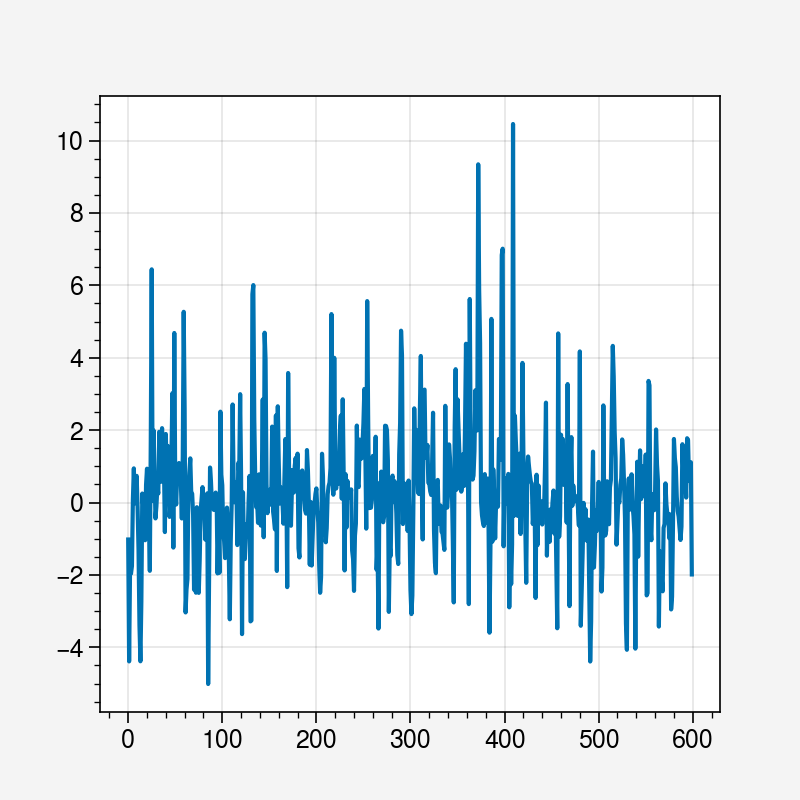

In [5]:
plt.plot(tas.tas.data[78])

In [6]:
tas_npy = tas.tas.data
hfls_npy = hfls.hfls.data
hfss_npy = hfss.hfss.data
psl_npy = psl.psl.data

In [45]:
tas_npy.shape

(469, 600)

In [46]:
tas2 = np.expand_dims(tas_npy, axis=2)

(469, 600, 1)

In [49]:
X_train = []
X_train.append(np.expand_dims(tas_npy, axis=2))
X_train.append(np.expand_dims(hfls_npy, axis=2))
X_train.append(np.expand_dims(hfss_npy, axis=2))
X_train.append(np.expand_dims(psl_npy, axis=2))

In [51]:
X_train = np.concatenate(X_train, axis = 2)

In [52]:
X_train.shape

(469, 600, 4)

In [26]:
seed = 42

In [73]:
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=4, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

Euclidean k-means
138723453.574 --> 74760456.702 --> 74702296.962 --> 74677442.888 --> 74669108.268 --> 74656096.441 --> 74649731.320 --> 74647808.245 --> 74647808.245 --> 


In [74]:
y_pred

array([2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       1, 2, 2, 1, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       1, 2, 2, 2, 3, 2, 3, 1, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 1,
       3, 2, 2, 1, 3, 3, 2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2,
       3, 2, 1, 3, 2, 3, 2, 1, 3, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 3, 2, 3, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 3, 1, 2,
       3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 3, 1,
       2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 3, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       3, 2, 2, 2, 3, 2, 2, 1, 3, 3, 3, 2, 2, 2, 1,

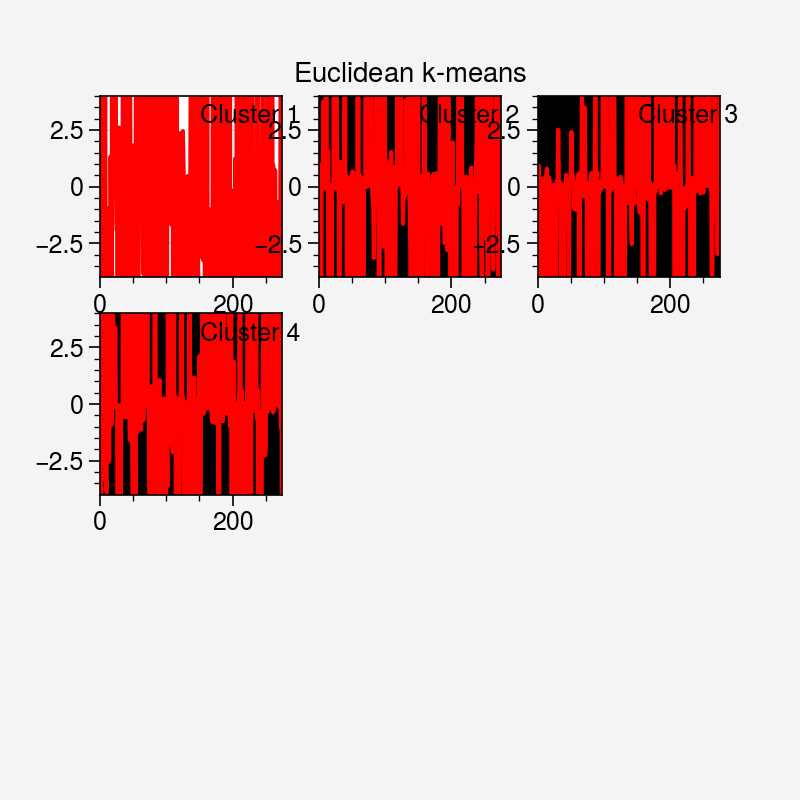

In [76]:
for yi in range(4):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

In [77]:
# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=4,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred = dba_km.fit_predict(X_train)

DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 469 out of 469 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1407 out of 1407 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1407 out of 1407 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1407 out of 1407 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.1s finished


32267254.537 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.2s finished


27406234.858 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.2s finished


27247909.379 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.2s finished


27197360.900 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.1s finished


27175349.351 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.2s finished


27156728.477 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.3s finished


27152203.759 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.2s finished


27114463.540 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.2s finished


27103221.267 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.2s finished


27103199.494 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.2s finished


27103199.494 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 469 out of 469 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1407 out of 1407 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1407 out of 1407 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1407 out of 1407 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.2s finished


31959811.398 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.2s finished


27289296.405 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.3s finished


27100701.416 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.2s finished


27006354.867 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.2s finished


26953238.728 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.2s finished


26942232.495 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.3s finished


26935052.749 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.2s finished


26935052.749 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.2s finished


In [78]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

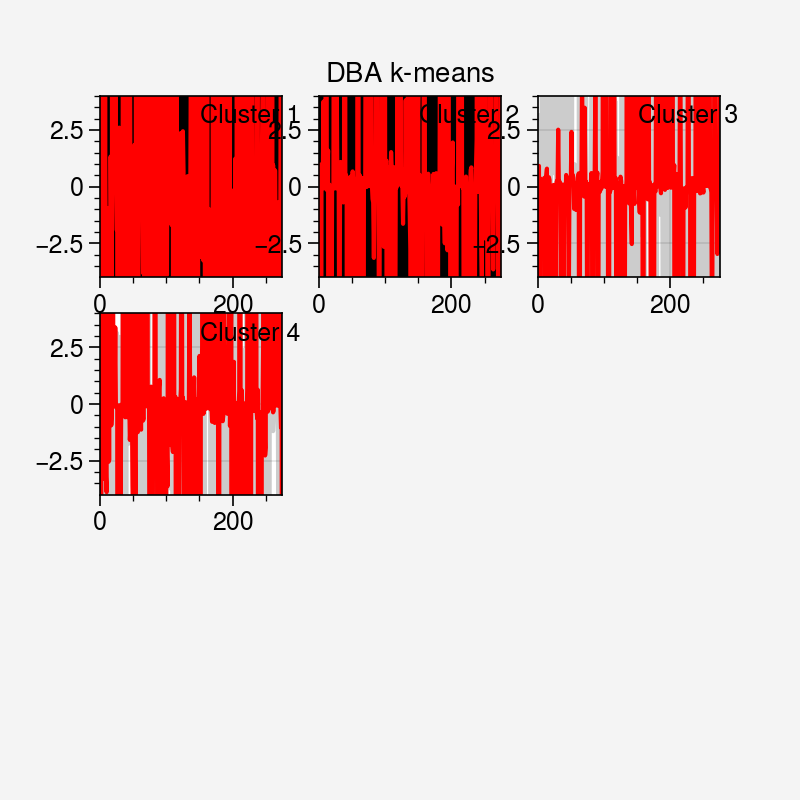

In [79]:
for yi in range(4):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

In [82]:
import pandas as pd

In [89]:
d = {'models': tas.models.data, 'Group': y_pred}

In [91]:
clustered = pd.DataFrame(d)

In [94]:
pd.set_option('display.max_rows', None)
print(clustered)

              models  Group
0         ACCESS-CM2      0
1         ACCESS-CM2      0
2         ACCESS-CM2      0
3         ACCESS-CM2      0
4         ACCESS-CM2      0
5         ACCESS-CM2      0
6         ACCESS-CM2      0
7         ACCESS-CM2      1
8         ACCESS-CM2      1
9         ACCESS-CM2      0
10     ACCESS-ESM1-5      1
11     ACCESS-ESM1-5      0
12     ACCESS-ESM1-5      0
13     ACCESS-ESM1-5      1
14     ACCESS-ESM1-5      0
15     ACCESS-ESM1-5      0
16     ACCESS-ESM1-5      0
17     ACCESS-ESM1-5      0
18     ACCESS-ESM1-5      0
19     ACCESS-ESM1-5      0
20     ACCESS-ESM1-5      1
21     ACCESS-ESM1-5      0
22     ACCESS-ESM1-5      1
23     ACCESS-ESM1-5      0
24     ACCESS-ESM1-5      0
25     ACCESS-ESM1-5      0
26     ACCESS-ESM1-5      0
27     ACCESS-ESM1-5      0
28     AWI-CM-1-1-MR      1
29     AWI-CM-1-1-MR      1
30     AWI-CM-1-1-MR      0
31     AWI-CM-1-1-MR      1
32     AWI-CM-1-1-MR      1
33     AWI-CM-1-1-MR      0
34     AWI-CM-1-1-MR